# KNN으로 포지션 예측하기

In [1]:
# Random값을 정하기
import numpy as np
np.random.seed(5)

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("../Data/basketball_train.csv")
test = pd.read_csv("../Data/basketball_test.csv")

In [4]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Kyle Korver,SG,2.4,2.8,0.3
1,Austin Rivers,SG,1.5,2.2,0.1
2,Iman Shumpert,SG,1.2,2.9,0.4
3,Clint Capela,C,0.0,8.1,1.2
4,Joe Harris,SG,1.6,2.8,0.2


In [5]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Marcin Gortat,C,0.0,10.4,0.7
1,Wayne Ellington,SG,2.4,2.1,0.1
2,Andre Drummond,C,0.0,13.8,1.1
3,Troy Daniels,SG,2.1,1.5,0.1
4,Justin Hamilton,C,0.9,4.1,0.7


In [6]:
print(train.shape)
print(train.count())
print(train.isna().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [7]:
print(test.shape)
print(test.count())
print(test.isna().sum())

(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k 찾기 (교차검증 - cross validation)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차 검증 해주는 모듈

In [9]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지만 사용한다
max_k_range = train.shape[0] // 2 # 몫만 출력
max_k_range

40

In [10]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
for i in range(3, max_k_range, 2):
  k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [11]:
# 점수 및 Train Data 정의
cross_validation_scores = []
x_train = train[["3P", "BLK", "TRB"]]
y_train = train["Pos"]

print(x_train.head())
print(y_train.head())

    3P  BLK  TRB
0  2.4  0.3  2.8
1  1.5  0.1  2.2
2  1.2  0.4  2.9
3  0.0  1.2  8.1
4  1.6  0.2  2.8
0    SG
1    SG
2    SG
3     C
4    SG
Name: Pos, dtype: object


In [12]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(
    knn, # 모델명
    x_train,
    y_train,
    cv=10, # cross validation 몇번 반복하는지 (교차검증 횟수)
    scoring="accuracy", # 점수는 어떤걸로 보여줄것인지
  )
  cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9625,
 0.925,
 0.9625,
 0.9375,
 0.925,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.825,
 0.8125,
 0.8125]

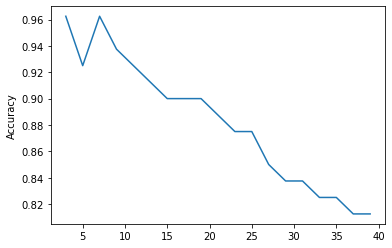

In [13]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_validation_scores)
plt.xlabel = "the number of k"
plt.ylabel("Accuracy")
plt.show()

In [14]:
# 가장 예측율이 높은 k를 선정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is", k)

The best number of k is 3


---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=k)

In [17]:
# 학습에 사용할 feature
x_train = train[["3P", "BLK"]]

In [18]:
# 학습에 사용할 target
y_train = train["Pos"]

In [19]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# 검증에 사용할 features
x_test = test[["3P","BLK"]]

In [21]:
# 검증의 정답
y_test = test["Pos"]

In [22]:
knn.score(x_test, y_test)

0.9

In [23]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [24]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
  {"예측값":pred, "정답":y_test}
)
comparison.head()

,예측값,정답
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C


### Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

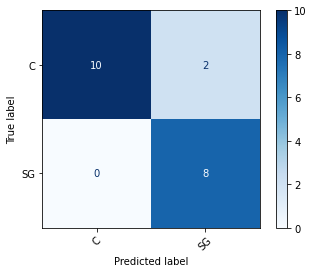

In [29]:
confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ["C","SG"]
disp = ConfusionMatrixDisplay(
  confusion_matrix = confusion_matrix1,
  display_labels = target_names
)
disp.plot(
  cmap = plt.cm.Blues,
  xticks_rotation = 45
)
confusion_matrix

---
# 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [30]:
# 학습에 사용할 feature
x_train = train[["3P", "BLK", "TRB"]]

In [31]:
# 학습에 사용할 target
y_train = train["Pos"]

In [32]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# 검증에 사용할 features
x_test = test[["3P","BLK", "TRB"]]

In [34]:
# 검증의 정답
y_test = test["Pos"]

In [35]:
knn.score(x_test, y_test)

0.85

In [36]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [37]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
  {"예측값":pred, "정답":y_test}
)
comparison.head()

,예측값,정답
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,SG,C


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

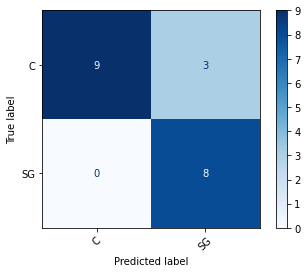

In [38]:
confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ["C","SG"]
disp = ConfusionMatrixDisplay(
  confusion_matrix = confusion_matrix1,
  display_labels = target_names
)
disp.plot(
  cmap = plt.cm.Blues,
  xticks_rotation = 45
)
confusion_matrix

#### 여기 졸면서 해서 좀 오타나 이런거 있을수도 있엉.....

3P : 3.4   
BLK : 0.5   
TRB : 3.7   
인 선수의 포지션은?

In [39]:
knn.predict([[3.4, 0.5, 3.7]])

array(['SG'], dtype=object)